Noise in images can be removed using simple image processing methodologies. The most straightforward of these is thresholding. By applying a pixel intensity threshold we reduce the effect of noise and make the main features clearer. An example of this is shown here.

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise

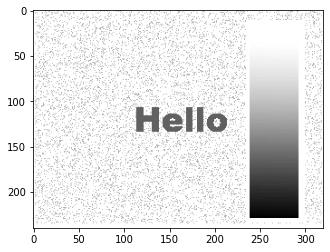

In [8]:
img_hello = cv.imread('source.bmp',cv.IMREAD_GRAYSCALE)
plt.imshow(img_hello, cmap='gray')

As can be seen the image contains lots of low intensity salt and pepper noise. By thresholding the image we can create a binary image making the text clearer and removing this noise. 

In [13]:
thresh,img_hello_thresh = cv.threshold(img_hello,100,255,cv.THRESH_BINARY)

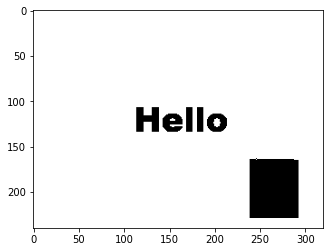

In [14]:
plt.imshow(img_hello_thresh, cmap='gray')

By using thresholding we have succesfully removed the noise from the image but at the price of altering the intensity information of the text. One alternative approach to remove this kind of noise is to use a filtering approach. Here we add some salt and pepper noise to a slightly more complex image and then attempt to filter it out using both a 3x3 average filter and a 3x3 median filter.

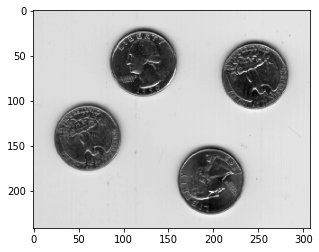

In [3]:
img_coin = cv.imread('test.png',cv.IMREAD_GRAYSCALE)
plt.imshow(img_coin, cmap='gray')

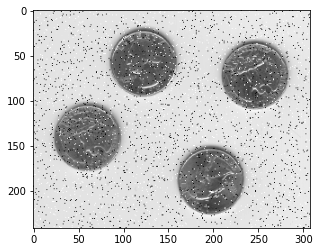

In [8]:
#Adding S and P noise
img_coin_sp = random_noise(img_coin,mode='s&p',amount = 0.05)
plt.imshow(img_coin_sp, cmap='gray')

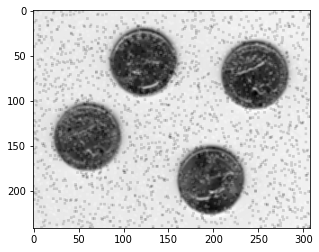

In [11]:
#average filter
kernel_avg = np.ones((3,3))/9
img_coin_avg = cv.filter2D(img_coin_sp,-1,kernel_avg)
plt.imshow(img_coin_avg, cmap='gray')

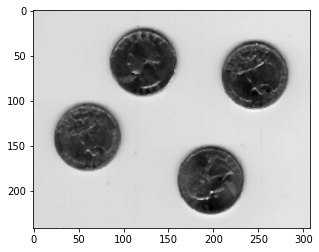

In [13]:
img_coin_med = cv.medianBlur(np.uint8(img_coin_sp*255),3)
plt.imshow(img_coin_med, cmap='gray')

As can be seen from the images above the median filtering appears to have achieved much better result, removing the salt and pepper noise. This is due to the fact the salt and pepper noise differs in value a great deal from the surrounding image values as they are black and white spots. This results in the average values when the average filter kernel passes over a piece of noise also being greatly different from the surrounding pixels given the outcome that the salt and pepper noise has become less intense, but instances have dilated slightly. The median filter does a much better job of filtering out the noise as the value that is assigned to noisy pixels is one of the surrounding values so it is more likely to blend in. 